You are given the root of a binary tree with unique values.

In one operation, you can choose any two nodes at the same level and swap their values.

Return the minimum number of operations needed to make the values at each level sorted in a strictly increasing order.

The level of a node is the number of edges along the path between it and the root node.

 

Example 1:

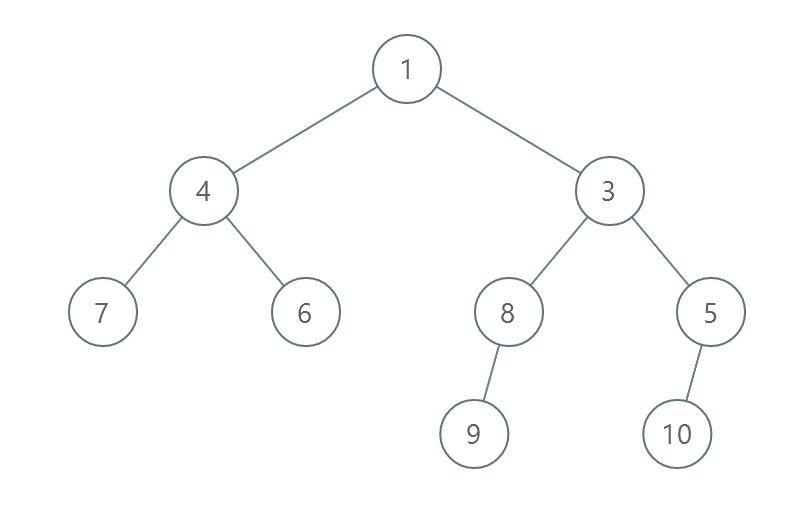

Input: root = [1,4,3,7,6,8,5,null,null,null,null,9,null,10]
Output: 3
Explanation:
- Swap 4 and 3. The 2nd level becomes [3,4].
- Swap 7 and 5. The 3rd level becomes [5,6,8,7].
- Swap 8 and 7. The 3rd level becomes [5,6,7,8].
We used 3 operations so return 3.
It can be proven that 3 is the minimum number of operations needed.

Example 2:

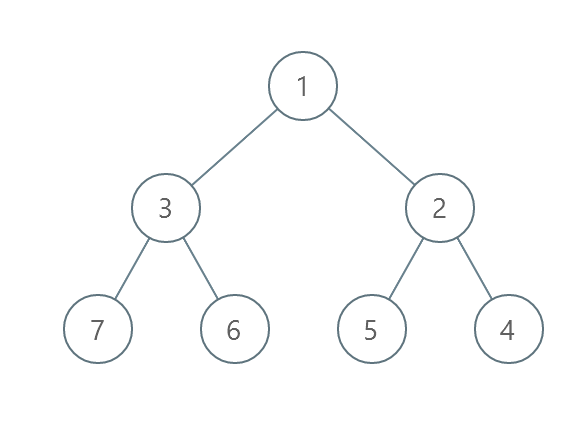

Input: root = [1,3,2,7,6,5,4]
Output: 3
Explanation:
- Swap 3 and 2. The 2nd level becomes [2,3].
- Swap 7 and 4. The 3rd level becomes [4,6,5,7].
- Swap 6 and 5. The 3rd level becomes [4,5,6,7].
We used 3 operations so return 3.
It can be proven that 3 is the minimum number of operations needed.

Example 3:

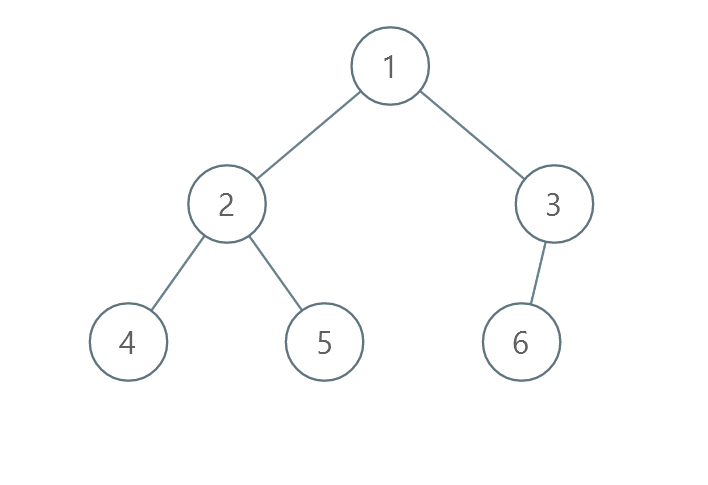

Input: root = [1,2,3,4,5,6]
Output: 0
Explanation: Each level is already sorted in increasing order so return 0.

 

Constraints:

    The number of nodes in the tree is in the range [1, 105].
    1 <= Node.val <= 105
    All the values of the tree are unique.



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def minimumOperations(self, root: Optional[TreeNode]) -> int:
        queue = deque([root])
        total_swaps = 0

        # Process tree level by level using BFS
        while queue:
            level_size = len(queue)
            level_values = []

            # Store level values and add children to queue
            for _ in range(level_size):
                node = queue.popleft()
                level_values.append(node.val)

                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)

            # Add minimum swaps needed for current level
            total_swaps += self._get_min_swaps(level_values)

        return total_swaps

    # Calculate minimum swaps needed to sort an array
    def _get_min_swaps(self, original: list) -> int:
        swaps = 0
        target = sorted(original)

        # Map to track current positions of values
        pos = {val: idx for idx, val in enumerate(original)}

        # For each position, swap until correct value is placed
        for i in range(len(original)):
            if original[i] != target[i]:
                swaps += 1

                # Update position of swapped values
                cur_pos = pos[target[i]]
                pos[original[i]] = cur_pos
                original[cur_pos] = original[i]

        return swaps